In [1]:
import warnings
warnings.filterwarnings('ignore')


import yfinance as yf
import pandas as pd
import numpy as np
import project_functions2 as pf
import classifier_functions as cf
import multi_model_builder as mmb

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

In [2]:
stock_list = ['AMZN', 'AAPL', 'FB','GOOGL', 'MSFT', 'TSLA']
stock_objects = {}
for stock in stock_list:
    stock_objects[stock] = yf.Ticker(stock)

In [3]:
stock_dfs = {}
for key in stock_objects:
    stock_dfs[key] = stock_objects[key].history(period='max')

for key in stock_dfs:
    stock_dfs[key] = pf.date_time_prep(stock_dfs[key]) 
    stock_dfs[key] = pf.rolling_aves(stock_dfs[key])
    stock_dfs[key] = pf.classifier_setup(stock_dfs[key], 5)

combine_df = pf.combiner(stock_dfs)

In [4]:
X_train, y_train, X_test, y_test = pf.multi_stock_train_test_split(combine_df, 365, stock_dfs)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
1 - dummy_majority.score(X_test_scaled, y_test)

0.3853881278538813

<Figure size 432x288 with 0 Axes>

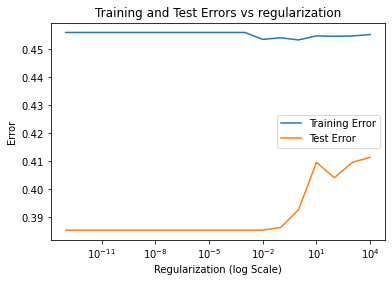

In [5]:
log_reg_df = cf.train_multiple_log_regression(X_train_scaled, y_train, X_test_scaled, y_test, 0.0000000000001, 10000, alpha=10)

In [6]:
log_reg_df

,C,Training Error,Test Error
0,1.000000e-13,0.456024,0.385388
1,1.000000e-12,0.456024,0.385388
2,1.000000e-11,0.456024,0.385388
3,1.000000e-10,0.456024,0.385388
4,1.000000e-09,0.456024,0.385388
5,1.000000e-08,0.456024,0.385388
6,1.000000e-07,0.456024,0.385388
7,1.000000e-06,0.456024,0.385388
8,1.000000e-05,0.456024,0.385388
9,1.000000e-04,0.456024,0.385388


<Figure size 432x288 with 0 Axes>

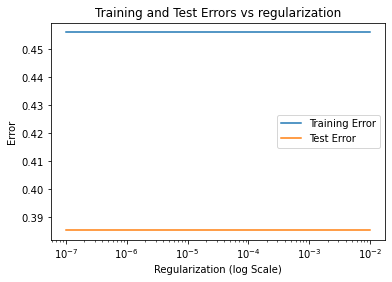

In [7]:
svm_df = cf.train_multiple_SVM(X_train_scaled, y_train, X_test_scaled, y_test, 0.0000001, 0.01, alpha=10, kernel='linear')

In [8]:
svm_df

,C,Training Error,Test Error
0,1.000000e-07,0.456024,0.385388
1,1.000000e-06,0.456024,0.385388
2,1.000000e-05,0.456024,0.385388
3,1.000000e-04,0.456024,0.385388
4,1.000000e-03,0.456024,0.385388
5,1.000000e-02,0.456024,0.385388


<Figure size 432x288 with 0 Axes>

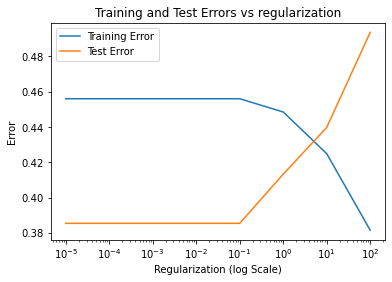

In [9]:
gaus_svm_df = cf.train_multiple_SVM(X_train_scaled, y_train, X_test_scaled, y_test, 0.00001, 100, alpha=10, kernel='rbf')

In [10]:
gaus_svm_df

,C,Training Error,Test Error
0,0.00001,0.456024,0.385388
1,0.00010,0.456024,0.385388
2,0.00100,0.456024,0.385388
3,0.01000,0.456024,0.385388
4,0.10000,0.456024,0.385388
5,1.00000,0.448522,0.413242
6,10.00000,0.424917,0.439726
7,100.00000,0.381537,0.493607


In [ ]:
rf_df = mmb.train_multiple_random_forests(combine_df, 365, stock_dfs, 10, 500, 5, 50, forest_step=10)

In [ ]:
re_df